# Problem Statement

## Taxi_Fare Prediction


### Dataset Description

Predicting the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations. Based on distance travelled from one place to another place could be some reliable costs.The aim of this playground competition, hosted in partnership with Google Cloud and Coursera, is to predict the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations.

### Data Attributes

 1.unique_id             
 2.amount                
 3.date_time_of_pickup    
 4.longitude_of_pickup   
 5.latitude_of_pickup    
 6.longitude_of_dropoff  
 7.latitude_of_dropoff   
 8. no_of_passenger 

## Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import warnings 
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv')
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [3]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df.shape

(50000, 8)

In [5]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [8]:
df.describe(include='all')

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


# Data Visualization

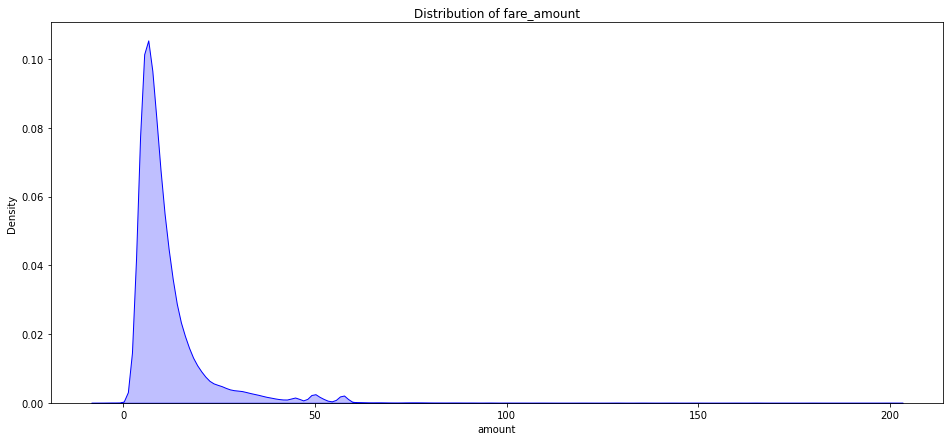

In [9]:
plt.figure(figsize=(16,7))

sns.kdeplot(x=df['amount'], shade=True, color='blue')
plt.title('Distribution of fare_amount')
plt.show()

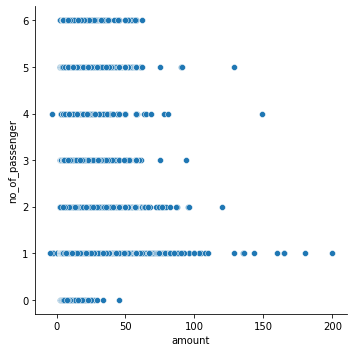

In [10]:
sns.relplot(data=df, x="amount", y="no_of_passenger")

In [ ]:
#sns.catplot(data=df,x='longitude_of_pickup',y='latitude_of_pickup')

In [ ]:
plt.figure(figsize=(10,10))
sns.violinplot(data=df,x="no_of_passenger", y="amount")
plt.title('Fare distribution by number of passengers')
plt.xlabel('Number of passengers')
plt.ylabel('Fare amount')

In [ ]:
#sns.barplot(data=df, x="longitude_of_pickup", y="longitude_of_dropoff")

In [ ]:
sns.displot(df, x="amount")

In [ ]:
sns.boxplot(x="no_of_passenger", y="amount",data=df)

In [ ]:
corr1=df.corr()
corr1

In [ ]:
sns.heatmap(corr1,annot=True)

In [ ]:
sns.pairplot(df,diag_kind='kde')

# Data Pre-processing

### Checking for Missing Values

In [ ]:
df.isnull().sum()

In [ ]:
df.nunique()

### Checking for duplicates

In [ ]:
df.duplicated().sum()

In [ ]:
df.duplicated()

### Removing unnecessary columns

In [ ]:
df.drop(columns=['unique_id','date_time_of_pickup'],inplace=True)

In [ ]:
df.dtypes

### split the data

In [ ]:
X=df.drop('amount',axis=1)
y=df['amount']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

### Outcomes of the dataset

In [ ]:
model1=DecisionTreeRegressor()
model1.fit(X_train,y_train)
print(model1.score(X_train,y_train))
print(model1.score(X_test,y_test))

In [ ]:
model2=GradientBoostingRegressor()
model2.fit(X_train,y_train)
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))

In [ ]:
model3=AdaBoostRegressor()
model3.fit(X_train,y_train)
print(model3.score(X_train,y_train))
print(model3.score(X_test,y_test))

In [ ]:
model4=RandomForestRegressor(n_estimators=20)
model4.fit(X_train,y_train)
print(model4.score(X_train,y_train))
print(model4.score(X_test,y_test))

In [ ]:
model5=SVR(kernel='rbf', gamma='scale)
model5.fit(X_train,y_train)
print(model5.score(X_train,y_train))
print(model5.score(X_test,y_test))

### Conclusion


In [ ]:
I come acrooss different algorithms to check accuracy of given 